In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
import pickle
import glob
from google.colab import drive
# import spacy
# !pip install keybert
# !python -m spacy download en_core_web_lg
# from keybert import KeyBERT
drive.mount('/content/drive')

Mounted at /content/drive


## Input

In [ ]:
1# Input
description = input("Project Description: ")
country = int(input("Country: ")) # United States: 1
currency = int(input("Currency: ")) # USD: 1
main_category = int(input("Parent Category: ")) # Technology: 4
sub_category = int(input("Sub Category: ")) # Software: 3200
funding_time = int(input("Funding Period (in days): ")) # 40
goal_amount = float(input("Funding Required (in currency entered above): ")) # 500

Project Description: Kickstarter is one of the leading reward-based crowdfunding platforms which helps entrepreneurs get funding from the people. However, only a one third of the projects succeeds in reaching their funding goal before reaching their deadline. Investors would want to invest in projects which have a higher probability of getting succeeded in a short period of time. Hence, we propose to provide a web interface which can help both investors to choose a valuable and potentially successful project and entrepreneurs by providing them guidelines on how to improve the chances of success.
Country: 1
Currency: 1
Parent Category: 4
Sub Category: 3200
Funding Period (in days): 40
Funding Required (in currency entered above): 500


## Description Score using Keyword Extraction on Description Dataset

In [ ]:
# Model Loading
import pickle
with open('/content/drive/My Drive/BE Project/Pickle Dumps/merged_normalized.pickle', 'rb') as f:
  merged_norm = pickle.load(f)
with open('/content/drive/My Drive/BE Project/Pickle Dumps/bert_model.pickle', 'rb') as f:
  bert_model = pickle.load(f)
with open('/content/drive/My Drive/BE Project/Pickle Dumps/spacy_model.pickle', 'rb') as f:
  spacy_model = pickle.load(f)

In [ ]:
# Function Declaration
def score_description(description_string,category):
  for i in range(len(merged_norm)):
    if merged_norm[i][0] == category:
      category_index = i
      break
  words = description_string.split()
  n_words = len(words)
  total_value = 0
  for word in words:
    current_value = 0
    for j in range(len(merged_norm[category_index][1])):
      if merged_norm[category_index][1][j][0] == word:
        current_value = merged_norm[category_index][1][j][1]
    total_value+=(1.2*n_words*current_value)
    current_value=0
    for k in range(len(merged_norm[category_index][2])):
      if merged_norm[category_index][2][k][0] == word:
        current_value = merged_norm[category_index][2][k][1]*(-1)
    total_value+=(1*n_words*current_value)
  return total_value

In [ ]:
# Description Score
category = input("Project Category: ")
description_score = score_description(description,category)
print("Description Score: ", description_score)

Project Category: Technology
Description Score:  3.058029943539192


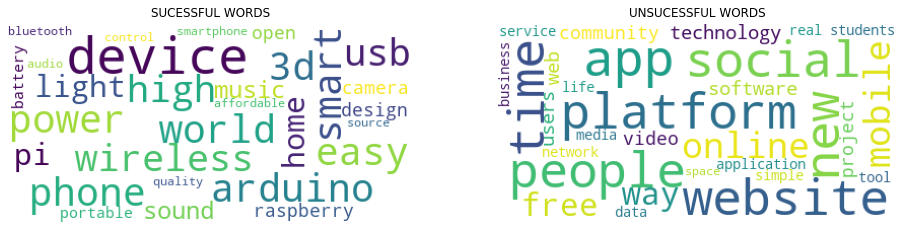

In [ ]:
# Word Cloud
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img1=Image.open('/content/drive/My Drive/BE Project/Word Cloud/Sucessful Words/Word_CLoud'+category+'.png')
img2=Image.open('/content/drive/My Drive/BE Project/Word Cloud/Unsucessful Words/Word_CLoud'+category+'.png')

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(16,9),sharey='row')
ax1.imshow(img1)
ax1.set_title('SUCESSFUL WORDS')
ax2.imshow(img2)
ax2.set_title('UNSUCESSFUL WORDS')
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()

## Metric Evaluation and Classification on Description Dataset

In [ ]:
!pip install textstat
import textstat

In [ ]:
# Flesh Kincaid Reading Ease
flesh_kincaid_reading_ease = textstat.flesch_reading_ease(description)
print("Flesh Kincaid Reading Ease: ", flesh_kincaid_reading_ease)

# Flesh Kincaid Grade Level
flesh_kincaid_grade_level = textstat.flesch_kincaid_grade(description)
print("Flesh Kincaid Grade Level: ", flesh_kincaid_grade_level)

# Gunning Fox Index
gunning_fog_index = textstat.gunning_fog(description)
print("Gunning Fog Index: ", gunning_fog_index)

# Coleman Liau Index
coleman_liau_index = textstat.coleman_liau_index(description)
print("Coleman Liau Index: ", coleman_liau_index)

# Automated Readability Index
automated_readability_index = textstat.automated_readability_index(description)
print("Automated Readability Index: ", automated_readability_index)

# Linsear Write Index
linsear_write_index = textstat.linsear_write_formula(description)
print("Linsear Write Index: ", linsear_write_index)

# Dale Chall Readability Index
dale_chall_readability_index = textstat.dale_chall_readability_score(description)
print("Dale Chall Readability Index: ", dale_chall_readability_index)

# Readability Consensus
readability_consensus = textstat.text_standard(description)
print("Readability Consensus: ", readability_consensus)
words1 = readability_consensus.split('and ')
words2 = words1[1].split(' ')
final_val = words2[0]
final_val = final_val[0:-2]
readability_consensus = int(final_val)

Flesh Kincaid Reading Ease:  56.79
Flesh Kincaid Grade Level:  11.0
Gunning Fog Index:  12.64
Coleman Liau Index:  13.87
Automated Readability Index:  15.4
Linsear Write Index:  13.875
Dale Chall Readability Index:  8.76
Readability Consensus:  13th and 14th grade


In [ ]:
# Model
df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/5.NLP Metric Evaluation of General Dataset/Model/NLP Metric Evaluation 3.csv')
X = df.drop(['state'], axis=1)
y = df['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(classification_report(y_test, y_predict))
df.head()

              precision    recall  f1-score   support

           0       0.51      0.37      0.43     13345
           1       0.68      0.79      0.73     22329

    accuracy                           0.63     35674
   macro avg       0.59      0.58      0.58     35674
weighted avg       0.61      0.63      0.62     35674



,n_flesh_kincaid_reading_ease,n_flesh_kincaid_grade_level,n_gunning_fog_index,n_coleman_liau_index,n_automated_readability_index,n_linsear_write_index,n_dale_chall_readability_index,n_readability_consensus,state
0,100.00,0.5,3.20,8.66,6.1,3.00,6.01,3,1
1,43.73,11.9,11.81,14.45,16.6,12.00,8.73,12,1
2,55.24,9.5,11.40,15.08,13.4,12.00,8.38,10,1
3,53.37,8.2,10.12,13.02,10.1,6.25,7.43,10,1
4,69.79,6.0,6.00,8.21,5.9,5.00,7.29,6,1


In [ ]:
# Save Model
with open(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/14. Final Models/Description_Classification_Model','wb') as f:
  pickle.dump(clf, f)

In [ ]:
# Classification based on Description Dataset
description_prediction = clf.predict([[flesh_kincaid_reading_ease, flesh_kincaid_grade_level, gunning_fog_index, coleman_liau_index, automated_readability_index, linsear_write_index, dale_chall_readability_index, readability_consensus]])
print("Project State: ", description_prediction[0])

Project State:  1


## Classification on General Dataset

In [ ]:
# Model
df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/7.General Dataset (Final)/General Dataset Cleaned Final 1.csv')
df = df[['country', 'currency', 'main_category', 'sub_category', 'funding_time', 'goal_amount', 'description_score', 'description_prediction', 'state']]
X = df.drop(['state'], axis=1)
y = df['state']
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(classification_report(y_test, y_predict))
df.head()

              precision    recall  f1-score   support

           0       0.88      0.84      0.86     12737
           1       0.89      0.92      0.91     18039

    accuracy                           0.89     30776
   macro avg       0.89      0.88      0.88     30776
weighted avg       0.89      0.89      0.89     30776



,country,currency,main_category,sub_category,funding_time,goal_amount,description_score,description_prediction,state
0,1,1,1,100,30,23333.0,1.554951,1,1
1,1,1,1,200,30,2000.0,-0.143421,1,1
2,10,6,4,300,30,78000.0,0.232367,1,1
3,20,14,11,400,48,220000.0,0.909679,1,1
4,1,1,5,500,43,20000.0,9.094467,1,1


In [ ]:
# Save Model
with open(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/14. Final Models/General_Classification_Model','wb') as f:
  pickle.dump(clf, f)

In [ ]:
# Classification based on General Dataset
general_prediction = clf.predict([[country, currency, main_category, sub_category, funding_time, goal_amount, description_score, description_prediction[0]]])
print("Project State: ", general_prediction)

Project State:  1


## Prediction of Pleded Amount based on General Dataset

In [ ]:
no_of_backers = int(input("Expected Number of Backers: "))

Expected Number of Backers: 30


In [ ]:
# Model
df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/7.General Dataset (Final)/General Dataset Cleaned Final 1.csv')
df = df[['country', 'currency', 'main_category', 'sub_category', 'funding_time', 'goal_amount', 'pledged_amount', 'no_of_backers', 'description_score', 'description_prediction']]
X = df.drop(['pledged_amount'], axis=1)
y = df['pledged_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
print(regressor.score(X_test,y_test))
df.head()

0.9276243694448572


,country,currency,main_category,sub_category,funding_time,goal_amount,pledged_amount,no_of_backers,description_score,description_prediction
0,1,1,1,100,30,23333.0,23508.83,256,1.554951,1
1,1,1,1,200,30,2000.0,2249.00,8,-0.143421,1
2,10,6,4,300,30,78000.0,151868.00,59,0.232367,1
3,20,14,11,400,48,220000.0,237609.00,6,0.909679,1
4,1,1,5,500,43,20000.0,26156.00,463,9.094467,1


In [ ]:
# Save Model
with open(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/14. Final Models/General_Prediction_Model','wb') as f:
  pickle.dump(regressor, f)

In [ ]:
# Prediction based on General Dataset
pledged_amount_prediction = regressor.predict([[country, currency, main_category, sub_category, funding_time, goal_amount, no_of_backers, 0.1, description_prediction[0]]])
print("Predicted Pledged Amount: ", pledged_amount_prediction[0])

Predict Pledged Amount:  [1062.34436]


## Input

In [ ]:
main_category = int(input("Parent Category: ")) # Technology 12
sub_category = int(input("Sub Category: ")) # Technology 19
country = int(input("Country: ")) # United States 10
goal = float(input("Goal Amount (in USD): ")) # 500
levels = int(input("Number of Reward Levels: ")) # 5
duration = int(input("Funding Period (in days): ")) # 40
min_reward = int(input("Minimum Reward (in USD): ")) # 5
max_reward = int(input("Maximum Reward (in USD): ")) # 50
mean_reward = float(input("Mean of all Rewards: ")) # 21
median_reward = float(input("Median of all Rewards: ")) # 15

Parent Category: 12
Sub Category: 19
Country: 10
Goal Amount (in USD): 5000
Number of Reward Levels: 7
Funding Period (in days): 47
Minimum Reward (in USD): 5
Maximum Reward (in USD): 250
Mean of all Rewards: 118
Median of all Rewards: 50


## Classification on Rewards Dataset

In [ ]:
# Model
df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/11.Rewards Dataset (Final)/Rewards Dataset Cleaned Final.csv')
X = df[['main_category','sub_category','country','goal','levels','duration','min_reward','max_reward','mean_reward','median_reward','updates','comments']]
y = df['status']
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(classification_report(y_test, y_predict))
df.head()

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      3637
           1       0.85      0.87      0.86      4459

    accuracy                           0.84      8096
   macro avg       0.84      0.84      0.84      8096
weighted avg       0.84      0.84      0.84      8096



,main_category,sub_category,country,status,goal,pledged,backers,levels,reward_levels,updates,comments,duration,min_reward,max_reward,mean_reward,median_reward
0,1,1,10,1,10500,11545,66,7,"[25, 50, 100, 250, 500, 1000, 2500]",10,2,30,25,2500,632,250
1,7,2,10,0,4000,20,2,5,"[1, 5, 10, 25, 50]",6,0,47,1,50,18,10
2,1,3,10,1,6000,6535,100,13,"[1, 10, 25, 30, 50, 75, 85, 100, 110, 250, 500...",4,0,32,1,5000,557,85
3,10,4,10,0,3500,0,0,6,"[10, 25, 50, 100, 150, 250]",2,0,30,10,250,98,75
4,1,1,10,1,3500,3582,39,7,"[5, 25, 50, 100, 250, 500, 1000]",8,0,21,5,1000,276,100


In [ ]:
# Save Model
with open(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/14. Final Models/Rewards_Classification_Model','wb') as f:
  pickle.dump(clf, f)

In [ ]:
# Classification based on Rewards Dataset
rewards_prediction = clf.predict([[main_category, sub_category, country, goal, levels, duration, min_reward, max_reward, mean_reward, median_reward]])
print("Project State: ", rewards_prediction[0])

Project State:  0


## Prediction of Pledged Amount based on Rewards Dataset

In [ ]:
backers = int(input("Expected Number of Backers: "))

Expected Number of Backers: 100


In [ ]:
# Model
df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/11.Rewards Dataset (Final)/Rewards Dataset Cleaned Final.csv')
df['country'] = df['country'] // 10
X = df[['main_category','sub_category','country','goal','backers','levels','duration','min_reward','max_reward','mean_reward','median_reward','updates','comments']]
y = df['pledged']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
print(regressor.score(X_test,y_test))
df.head()

0.4410170023268767


,main_category,sub_category,country,status,goal,pledged,backers,levels,reward_levels,updates,comments,duration,min_reward,max_reward,mean_reward,median_reward
0,1,1,1,1,10500,11545,66,7,"[25, 50, 100, 250, 500, 1000, 2500]",10,2,30,25,2500,632,250
1,7,2,1,0,4000,20,2,5,"[1, 5, 10, 25, 50]",6,0,47,1,50,18,10
2,1,3,1,1,6000,6535,100,13,"[1, 10, 25, 30, 50, 75, 85, 100, 110, 250, 500...",4,0,32,1,5000,557,85
3,10,4,1,0,3500,0,0,6,"[10, 25, 50, 100, 150, 250]",2,0,30,10,250,98,75
4,1,1,1,1,3500,3582,39,7,"[5, 25, 50, 100, 250, 500, 1000]",8,0,21,5,1000,276,100


In [ ]:
# Save Model
with open(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/14. Final Models/Rewards_Prediction_Model','wb') as f:
  pickle.dump(regressor, f)

In [ ]:
# Prediction based on Rewards Dataset
pledged_amount_prediction = regressor.predict([[main_category, sub_category, country//10, goal, backers, levels, duration, min_reward, max_reward, mean_reward, median_reward]])
print("Predicted Pledged Amount: ", pledged_amount_prediction[0])

Predicted Pledged Amount:  5985.872


## Input

In [ ]:
currency = int(input("Currency: ")) # USD 1
main_category = int(input("Parent Category: ")) # Technology 9
sub_category = int(input("Sub Category: ")) # Technoloy 1000
rewards = int(input("Number of Reward Levels: "))
goal = float(input("Goal Amount (in USD): "))
duration = int(input("Funding Period (in days): "))
facebook_connected = int(input("Is Facebook Connected: "))
facebook_friends = int(input("Number of Facebook Friends: "))
facebook_shares = int(input("Number of Facebook Shares of this Project: "))
has_video = int(input("Does the Project have a Video Demo: "))
has_website = int(input("Does the Project have a Website: "))
projects_created = int(input("Number of Previous Kickstarter Projects of the Creator: "))
projects_backed = int(input("Number of Previously Backed Kickstarter Projects of the Creator: "))
videos = int(input("Number of Videos: "))
images = int(input("Number of Images: "))
description_words = int(input("Number of Words in the Project Description: "))
risks_and_challenges_words = int(input("Number of Words in Risks and Challenges: "))
faqs = int(input("Number of FAQ's: "))

Currency: 1
Parent Category: 9
Sub Category: 1000
Number of Reward Levels: 7
Goal Amount: 20000
Funding Period (in days): 27
Is Facebook Connected: 1
Number of Facebook Friends: 1200
Number of Facebook Shares of this Project: 2
Does the Project have a Video Demo: 0
Does the Project have a Website: 1
Number of Previous Kickstarter Projects of the Creator: 0
Number of Previously Backed Kickstarter Projects of the Creator: 0
Number of Videos: 0
Number of Images: 8
Number of Words in the Project Description80
Number of Words in Risks and Challenges: 40
Number of FAQ's: 2


## Classification on Social Media Dataset

In [ ]:
# Model
df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/9.Content Dataset (Final)/Content Dataset Cleaned Final.csv')
X = df[['Currency','Main Category','Sub Category','Rewards','Goal','Duration','Facebook Connected','Facebook Friends','Facebook Shares','Has Video','Has Website','Projects Created','Projects Backed','Videos','Images','Description Words','Risks and Challenges Words','FAQ']]
y = df['Status']
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(classification_report(y_test, y_predict))
df.head()

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1817
           1       0.80      0.84      0.82      1796

    accuracy                           0.82      3613
   macro avg       0.82      0.82      0.82      3613
weighted avg       0.82      0.82      0.82      3613



,Status,Currency,Main Category,Sub Category,Rewards,Goal,Pledged,Backers,Duration,Facebook Connected,Facebook Friends,Facebook Shares,Has Video,Has Website,Projects Created,Projects Backed,Videos,Images,Description Words,Risks and Challenges Words,FAQ
0,0,1,6,100,9,20000,6,2,30,1,272,70,1,0,1,0,0,2,297,153,0
1,0,1,1,200,8,3000,180,5,33,1,573,57,1,0,1,4,0,0,276,98,0
2,0,1,8,300,17,5000,1941,62,30,0,0,158,0,1,2,2,0,12,1049,66,2
3,0,1,3,400,4,5000,130,5,60,1,1285,2,1,1,1,2,0,0,309,169,0
4,0,1,3,500,12,12000,1015,16,30,1,969,411,1,1,1,0,0,6,1636,216,0


In [ ]:
# Save Model
with open(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/14. Final Models/Content_Classification_Model','wb') as f:
  pickle.dump(clf, f)

In [ ]:
# Classification based on Social Media Dataset
social_media_prediction = clf.predict([[currency, main_category, sub_category, rewards, goal, duration, facebook_connected, facebook_friends, facebook_shares, has_video, has_website, projects_created, projects_backed, videos, images, description_words, risks_and_challenges_words, faqs]])
print("Project State: ", social_media_prediction[0])

Project State:  1


## Prediction of Pledged Amount based on Social Media Dataset

In [ ]:
backers = int(input("Expected Number of Backers: "))

Expected Number of Backers: 150


In [ ]:
# Model
df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/9.Content Dataset (Final)/Content Dataset Cleaned Final.csv')
X = df[['Currency','Main Category','Sub Category','Rewards','Goal','Backers','Duration','Facebook Connected','Facebook Friends','Facebook Shares','Has Video','Has Website','Projects Created','Projects Backed','Videos','Images','Description Words','Risks and Challenges Words','FAQ']]
y = df['Pledged']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
print(regressor.score(X_test,y_test))
df.head()

0.5923962007272953


,Status,Currency,Main Category,Sub Category,Rewards,Goal,Pledged,Backers,Duration,Facebook Connected,Facebook Friends,Facebook Shares,Has Video,Has Website,Projects Created,Projects Backed,Videos,Images,Description Words,Risks and Challenges Words,FAQ
0,0,1,6,100,9,20000,6,2,30,1,272,70,1,0,1,0,0,2,297,153,0
1,0,1,1,200,8,3000,180,5,33,1,573,57,1,0,1,4,0,0,276,98,0
2,0,1,8,300,17,5000,1941,62,30,0,0,158,0,1,2,2,0,12,1049,66,2
3,0,1,3,400,4,5000,130,5,60,1,1285,2,1,1,1,2,0,0,309,169,0
4,0,1,3,500,12,12000,1015,16,30,1,969,411,1,1,1,0,0,6,1636,216,0


In [ ]:
# Save Model
with open(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/14. Final Models/Content_Prediction_Model','wb') as f:
  pickle.dump(regressor, f)